# 8. Introduction to NLP (Natural Language Processing) in TensorFlow Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

%matplotlib inline

In [2]:
!nvidia-smi

Fri Jul 15 06:05:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
BASE_DIR = "/content/drive/MyDrive/TensorFlow Developer Certification"

In [6]:
# Read in the data
train_df = pd.read_csv(f'{BASE_DIR}/Data/NLP/train.csv')
test_df = pd.read_csv(f'{BASE_DIR}/Data/NLP/test.csv')

In [7]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df['text'].to_numpy(), train_df['target'].to_numpy(), test_size=0.1, random_state = 42)

In [9]:
pd.Series(train_labels).value_counts()/pd.Series(train_labels).value_counts().sum()

0    0.571595
1    0.428405
dtype: float64

In [10]:
train_df.target.value_counts()/train_df.target.value_counts().sum()

0    0.57034
1    0.42966
Name: target, dtype: float64

Great! The distribution is virtually the same which means we can proceed towards the training.

In [11]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"

--2022-07-15 06:08:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-15 06:08:40 (56.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [12]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, make_confusion_matrix, calculate_results, unzip_data

### 1. Rebuild, compile and train model_1, model_2 and model_5 using the Keras Sequential API instead of the Functional API.

In [ ]:
MAX_TOKENS = 10000
LENGTH_OF_SEQUENCE = 15

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens = MAX_TOKENS, output_sequence_length = LENGTH_OF_SEQUENCE, pad_to_max_tokens = True, name = "text_vectorisation_layer")
text_vectorizer.adapt(train_sentences)

model_1 = tf.keras.Sequential(
    [
        text_vectorizer,
        tf.keras.layers.Embedding(input_dim = MAX_TOKENS, output_dim = 128, input_length = LENGTH_OF_SEQUENCE, name = "embedding_layer"),
        tf.keras.layers.GlobalMaxPool1D(name = "global_max_pooling_layer"),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ], name = "model_1_sequential"
)

In [ ]:
model_1.summary()

Model: "model_1_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorisation_layer (T  (None, 15)               0         
 extVectorization)                                               
                                                                 
 embedding_layer (Embedding)  (None, 15, 128)          1280000   
                                                                 
 global_max_pooling_layer (G  (None, 128)              0         
 lobalMaxPooling1D)                                              
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [16]:
SAVE_DIR = f"{BASE_DIR}/TensorBoard/NLP"

In [ ]:
# Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_model_1 = model_1.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, "model_1_dense_sequential")]
)

Saving TensorBoard log files to: TensorBoard/NLP/model_1_dense_sequential/20220715-010544
Epoch 1/5
215/215 [==============================] - 4s 11ms/step - loss: 0.6378 - accuracy: 0.6627 - val_loss: 0.5756 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4699 - accuracy: 0.8260 - val_loss: 0.4855 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3406 - accuracy: 0.8755 - val_loss: 0.4739 - val_accuracy: 0.7992
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2579 - accuracy: 0.9075 - val_loss: 0.4827 - val_accuracy: 0.7940
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1976 - accuracy: 0.9323 - val_loss: 0.4996 - val_accuracy: 0.7953


In [ ]:
model_1_results = calculate_results(val_labels, tf.squeeze(tf.round(model_1.predict(val_sentences))))
model_1_results

24/24 [==============================] - 0s 7ms/step


{'accuracy': 79.52755905511812,
 'precision': 0.7960291067316854,
 'recall': 0.7952755905511811,
 'f1': 0.7933872033947167}

And that sorts out model_1.

In [ ]:
model_2 = tf.keras.Sequential(
    [
        text_vectorizer,
        tf.keras.layers.Embedding(input_dim = MAX_TOKENS, output_dim = 128, input_length = LENGTH_OF_SEQUENCE, name = "embedding_layer"),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ], name = "model_2"
)

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorisation_layer (T  (None, 15)               0         
 extVectorization)                                               
                                                                 
 embedding_layer (Embedding)  (None, 15, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_model_2 = model_2.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, "model_2_lstm_sequential")]
)

Saving TensorBoard log files to: TensorBoard/NLP/model_2_lstm_sequential/20220715-011530
Epoch 1/5
215/215 [==============================] - 19s 13ms/step - loss: 0.5103 - accuracy: 0.7460 - val_loss: 0.4697 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3078 - accuracy: 0.8707 - val_loss: 0.4919 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2094 - accuracy: 0.9216 - val_loss: 0.6366 - val_accuracy: 0.7336
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1423 - accuracy: 0.9482 - val_loss: 0.8412 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0995 - accuracy: 0.9609 - val_loss: 0.8809 - val_accuracy: 0.7428


In [ ]:
model_2_results = calculate_results(val_labels, tf.squeeze(tf.round(model_2.predict(val_sentences))))
model_2_results

24/24 [==============================] - 1s 14ms/step


{'accuracy': 74.2782152230971,
 'precision': 0.7418286470789891,
 'recall': 0.7427821522309711,
 'f1': 0.7417868391767628}

Okay. This seems to have worsened performance!

In [ ]:
model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape = (1,), dtype = tf.string, name = "input_layer"),
        text_vectorizer,
        tf.keras.layers.Embedding(input_dim = MAX_TOKENS, output_dim = 128, input_length = LENGTH_OF_SEQUENCE, name = "embedding_layer"),
        tf.keras.layers.Conv1D(64, 5, padding = "valid", activation = "relu", name = "conv_layer"),
        tf.keras.layers.GlobalMaxPool1D(name = "max_pooling_1d_layer"),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ], name = "model_5"
)

model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorisation_layer (T  (None, 15)               0         
 extVectorization)                                               
                                                                 
 embedding_layer (Embedding)  (None, 15, 128)          1280000   
                                                                 
 conv_layer (Conv1D)         (None, 11, 64)            41024     
                                                                 
 max_pooling_1d_layer (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 1,321,089
Trainable params: 1,321,089
Non-tra

In [ ]:
# Compile the model
model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_model_5 = model_5.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, "model_5_conv1d_sequential")]
)

Saving TensorBoard log files to: TensorBoard/NLP/model_5_conv1d_sequential/20220715-013201
Epoch 1/5
215/215 [==============================] - 3s 11ms/step - loss: 0.5515 - accuracy: 0.7167 - val_loss: 0.4801 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3286 - accuracy: 0.8643 - val_loss: 0.5201 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2020 - accuracy: 0.9283 - val_loss: 0.6178 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1274 - accuracy: 0.9575 - val_loss: 0.6954 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0941 - accuracy: 0.9696 - val_loss: 0.7473 - val_accuracy: 0.7546


In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5.predict(val_sentences)))
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

24/24 [==============================] - 0s 3ms/step


{'accuracy': 75.45931758530183,
 'precision': 0.7542507437514857,
 'recall': 0.7545931758530183,
 'f1': 0.7543892493889404}

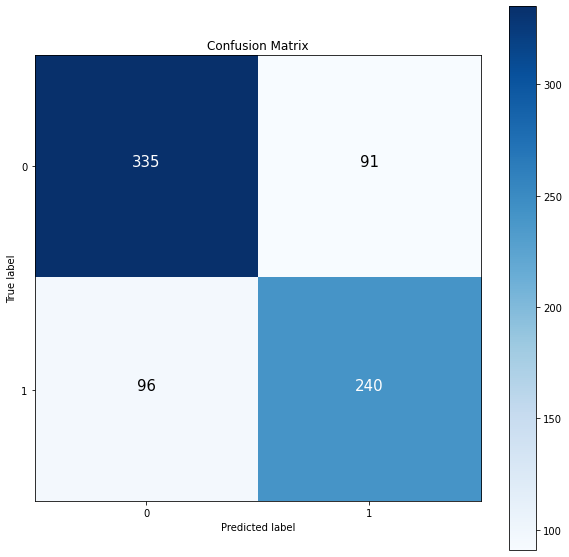

In [ ]:
make_confusion_matrix(val_labels, model_5_preds)

### 2. Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [ ]:
train_subset_idx = np.random.choice(len(train_sentences),int(0.1*len(train_sentences)))
train_sentences_subs = train_sentences[train_subset_idx]
train_labels_subs = train_labels[train_subset_idx]

In [ ]:
pd.Series(train_labels_subs).value_counts()/pd.Series(train_labels_subs).value_counts().sum()

0    0.548905
1    0.451095
dtype: float64

It does retain the distribution reasonably enough.

In [ ]:
model_baseline = Pipeline(
    [
        ("tf_idf_vectorizer", TfidfVectorizer()),
        ("naive_bayes", MultinomialNB())
    ]
)

model_baseline.fit(train_sentences_subs, train_labels_subs)

Pipeline(steps=[('tf_idf_vectorizer', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [ ]:
baseline_predictions = model_baseline.predict(val_sentences)

In [ ]:
model_baseline_results = calculate_results(val_labels, baseline_predictions)
model_baseline_results

{'accuracy': 75.19685039370079,
 'precision': 0.7728274037322337,
 'recall': 0.7519685039370079,
 'f1': 0.7398286185223064}

### 3. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting training=True when instantiating it as a Keras layer.

In [14]:
import tensorflow_hub as hub

In [15]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', trainable = True, input_shape = (), dtype = tf.string, name = "USE")

model_USE_fine_tune = tf.keras.Sequential(
    [
        sentence_encoder_layer,
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ]
)

model_USE_fine_tune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 output_layer (Dense)        (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 256,798,337
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
model_USE_fine_tune.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_model_USE_fine_tune = model_USE_fine_tune.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, "model_USE_fine_tune")]
)

Saving TensorBoard log files to: /content/drive/MyDrive/TensorFlow Developer Certification/TensorBoard/NLP/model_USE_fine_tune/20220715-061001
Epoch 1/5
215/215 [==============================] - 43s 155ms/step - loss: 0.4652 - accuracy: 0.7926 - val_loss: 0.4108 - val_accuracy: 0.8333
Epoch 2/5
215/215 [==============================] - 35s 161ms/step - loss: 0.2502 - accuracy: 0.9061 - val_loss: 0.4506 - val_accuracy: 0.8176
Epoch 3/5
215/215 [==============================] - 33s 153ms/step - loss: 0.0885 - accuracy: 0.9721 - val_loss: 0.5082 - val_accuracy: 0.7992
Epoch 4/5
215/215 [==============================] - 33s 153ms/step - loss: 0.0498 - accuracy: 0.9845 - val_loss: 0.5810 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 33s 155ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.6756 - val_accuracy: 0.7467


In [18]:
model_USE_fine_tune_preds = tf.squeeze(tf.round(model_USE_fine_tune.predict(val_sentences)))

In [19]:
model_USE_fine_tune_results = calculate_results(val_labels, model_USE_fine_tune_preds)
model_USE_fine_tune_results

{'accuracy': 74.67191601049869,
 'f1': 0.7457015892930551,
 'precision': 0.7772931068180235,
 'recall': 0.7467191601049868}

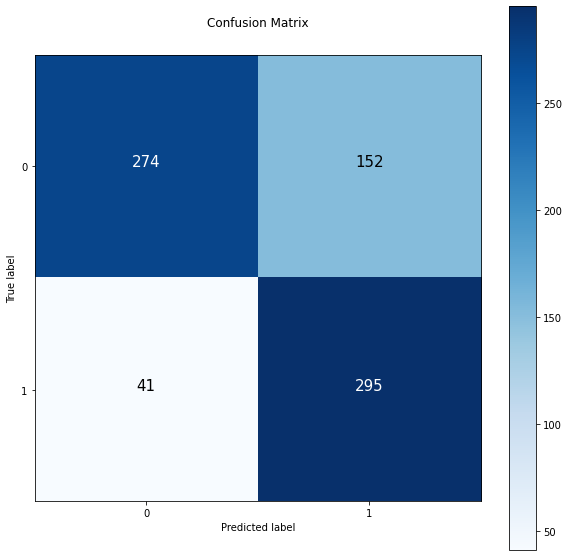

In [20]:
make_confusion_matrix(val_labels, model_USE_fine_tune_preds)

This is overfitting. Let's have another go.

In [24]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', trainable = True, input_shape = (), dtype = tf.string, name = "USE")

model_USE_fine_tune_mod = tf.keras.Sequential(
    [
        sentence_encoder_layer,
        tf.keras.layers.Dense(128, activation = "relu", name = "prefinal_dense_layer"),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ], name = "USE_fine_tune"
)

model_USE_fine_tune_mod.summary()

Model: "USE_fine_tune"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 prefinal_dense_layer (Dense  (None, 128)              65664     
 )                                                               
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 256,863,617
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
model_USE_fine_tune_mod.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_model_USE_fine_tune_mod = model_USE_fine_tune_mod.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, "model_USE_fine_tune")]
)

Saving TensorBoard log files to: /content/drive/MyDrive/TensorFlow Developer Certification/TensorBoard/NLP/model_USE_fine_tune/20220715-061609
Epoch 1/5
215/215 [==============================] - 42s 164ms/step - loss: 0.4444 - accuracy: 0.7989 - val_loss: 0.4239 - val_accuracy: 0.8268
Epoch 2/5
215/215 [==============================] - 34s 157ms/step - loss: 0.2309 - accuracy: 0.9091 - val_loss: 0.4409 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 34s 156ms/step - loss: 0.0800 - accuracy: 0.9734 - val_loss: 0.5561 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 33s 153ms/step - loss: 0.0446 - accuracy: 0.9853 - val_loss: 0.6005 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 33s 153ms/step - loss: 0.0273 - accuracy: 0.9898 - val_loss: 0.6415 - val_accuracy: 0.7769


In [26]:
model_USE_fine_tune_mod_preds = tf.squeeze(tf.round(model_USE_fine_tune_mod.predict(val_sentences)))

In [27]:
model_USE_fine_tune_mod_results = calculate_results(val_labels, model_USE_fine_tune_mod_preds)
model_USE_fine_tune_mod_results

{'accuracy': 77.69028871391076,
 'f1': 0.7761406445516676,
 'precision': 0.7762584304702861,
 'recall': 0.7769028871391076}

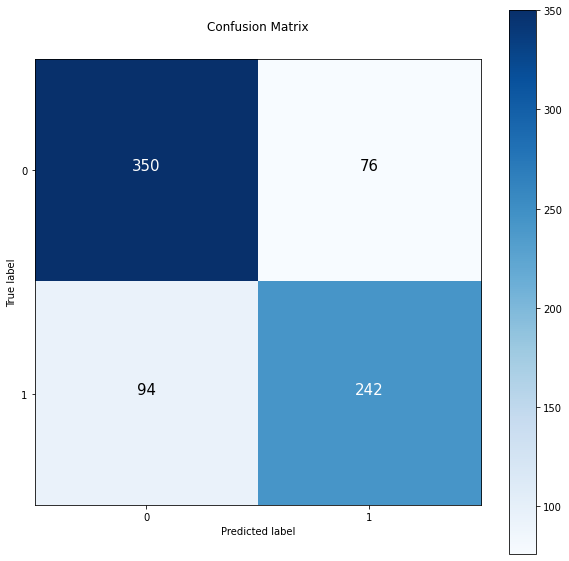

In [28]:
make_confusion_matrix(val_labels, model_USE_fine_tune_mod_preds)

Its still overfitting so I guess the model is too big for the kind and amount of data we have.